In [ ]:
import tensorflow as tf
print(tf.__version__)
!pip install --upgrade tensorflow
model.fit(features_set, labels, epochs=50, batch_size=20)

2.14.0
Epoch 1/50
27/27 [==============================] - 10s 110ms/step - loss: 0.0077
Epoch 2/50
27/27 [==============================] - 3s 111ms/step - loss: 0.0072
Epoch 3/50
27/27 [==============================] - 3s 112ms/step - loss: 0.0062
Epoch 4/50
27/27 [==============================] - 5s 177ms/step - loss: 0.0090
Epoch 5/50
27/27 [==============================] - 3s 110ms/step - loss: 0.0054
Epoch 6/50
27/27 [==============================] - 3s 111ms/step - loss: 0.0041
Epoch 7/50
27/27 [==============================] - 3s 113ms/step - loss: 0.0043
Epoch 8/50
27/27 [==============================] - 4s 161ms/step - loss: 0.0045
Epoch 9/50
27/27 [==============================] - 3s 126ms/step - loss: 0.0045
Epoch 10/50
27/27 [==============================] - 3s 111ms/step - loss: 0.0051
Epoch 11/50
27/27 [==============================] - 4s 158ms/step - loss: 0.0045
Epoch 12/50
27/27 [==============================] - 4s 164ms/step - loss: 0.0049
Epoch 13/50
27/27

In [ ]:
a=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
a

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
a.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
a.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
b=a.reset_index()['Close']
b

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

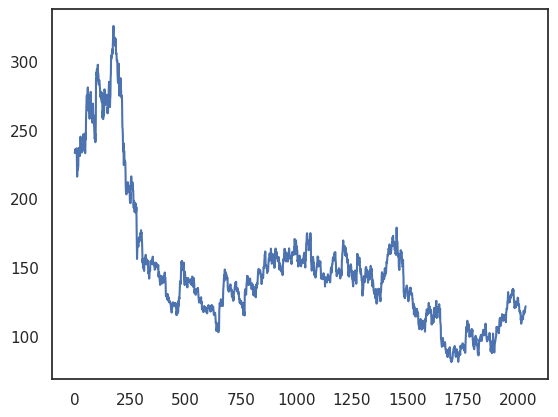

In [ ]:
plt.plot(b)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
c=MinMaxScaler(feature_range=(0,1))
d=c.fit_transform(np.array(b).reshape(-1,1))
print(d)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [ ]:
X_train = []
y_train = []
for i in range(60,2035):
    X_train.append(d[i-60:i,0])
    y_train.append(d[i-50:i,0])
X_train,y_train=np.array(X_train),np.array(y_train)


X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1], 1 ))

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.python import tf2
# from keras import distribute
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
62/62 [==============================] - 19s 142ms/step - loss: 0.0094
Epoch 2/5
62/62 [==============================] - 8s 130ms/step - loss: 0.0029
Epoch 3/5
62/62 [==============================] - 9s 152ms/step - loss: 0.0026
Epoch 4/5
62/62 [==============================] - 7s 119ms/step - loss: 0.0026
Epoch 5/5
62/62 [==============================] - 9s 151ms/step - loss: 0.0029


In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total=pd.concat((a['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=c.transform(inputs)
x_test=[]
for i in range(60,76):
    x_test.append(inputs[i-60:i, 0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=model.predict(x_test)
predicted_stock_price=c.inverse_transform(predicted_stock_price)


1/1 [==============================] - 2s 2s/step


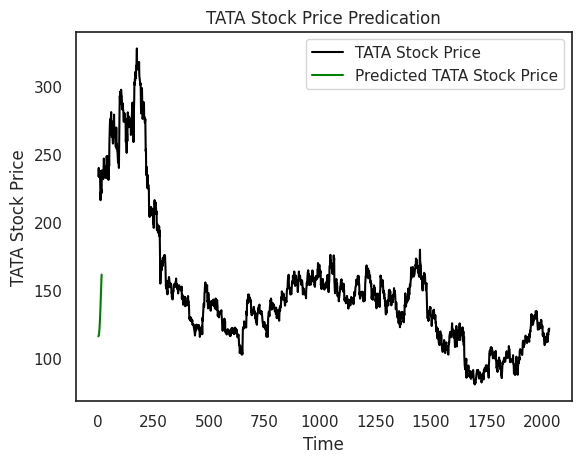

In [ ]:
plt.plot(real_stock_price,color='black',label='TATA Stock Price')
plt.plot(predicted_stock_price,color='green',label='Predicted TATA Stock Price')
plt.title('TATA Stock Price Predication')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()